In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
from scipy.io import loadmat
from torchvision import datasets
from torch.nn import functional as F
from torchvision import transforms
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
from torchvision.datasets import ImageFolder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,f1_score, classification_report
from torchvision.io import read_image
from PIL import Image, ImageDraw, ImageFilter

In [2]:
dataset_train = datasets.ImageFolder('./train')
dataset_test = datasets.ImageFolder('./test')

In [3]:
len(dataset_train),len(dataset_test)

(1025, 100)

In [4]:
train_transformations = transforms.Compose([
transforms.RandomVerticalFlip(),
transforms.RandomHorizontalFlip(),
transforms.RandomRotation(10),
transforms.Resize((32,32)), #resize input images to 32,32
transforms.ToTensor(),
transforms.Normalize([0.456, 0.456, 0.456], [0.225, 0.225, 0.225])])
test_transformations = transforms.Compose([
transforms.Resize((32,32)), #resize input images to 32,32
transforms.ToTensor(),
transforms.Normalize([0.456, 0.456, 0.456], [0.225, 0.225, 0.225])])
 
#apply the train and test transformations 
training_dataset = ImageFolder('./train', transform=train_transformations)
testing_dataset= ImageFolder('./test', transform=test_transformations)


In [5]:
for images, labels in dataset_train:
 print(labels)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [6]:
#splitting training dataset into train_ds and val_ds
random_seed = 42
torch.manual_seed(random_seed);
val_size = 100
train_size = len(training_dataset) - val_size
train_ds, val_ds = random_split(training_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(925, 100)

In [7]:
train_dl = torch.utils.data.DataLoader(training_dataset, batch_size = 55, shuffle=True, num_workers=4, pin_memory=True)
test_dl = torch.utils.data.DataLoader(testing_dataset, batch_size =55 ,shuffle =True, num_workers=4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 2, 3, 1, 2, 1, 0, 2, 0, 0, 3, 3, 1, 1,
        3, 2, 3, 3, 1, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2,
        0, 1, 3, 3, 3, 3, 0, 0, 3, 2, 3, 0, 2, 3, 1, 3, 0, 3, 3, 3, 2, 3, 1, 2,
        0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 3, 3, 0, 0, 1, 0, 0, 2, 2, 2, 3, 2, 0, 3,
        3, 0, 1, 3])


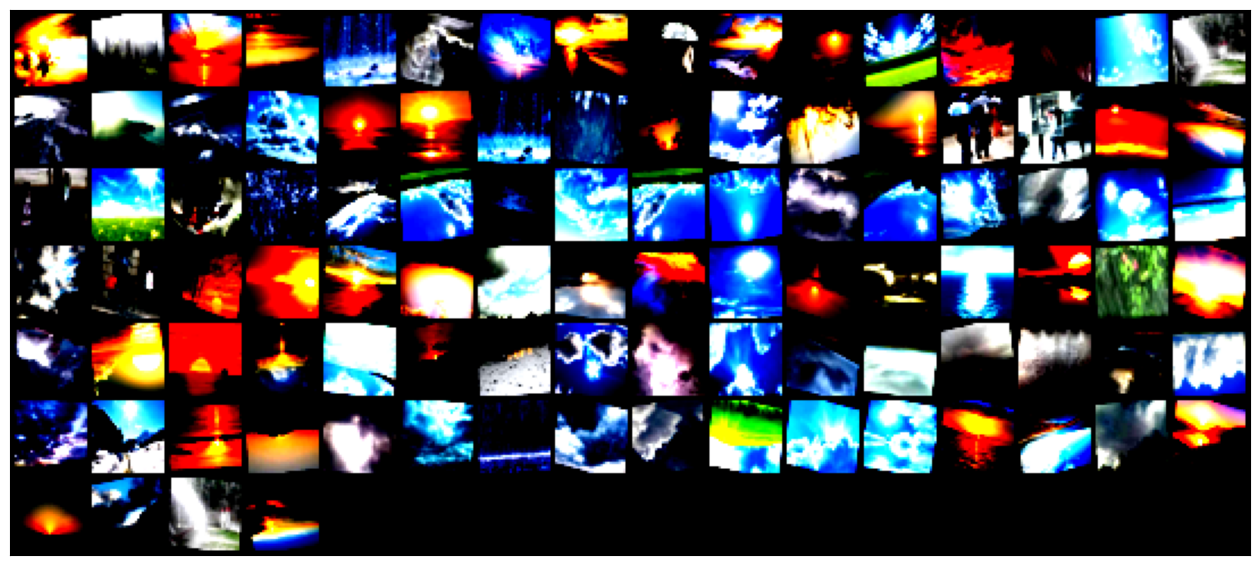

In [10]:
batch_size = 55
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

def show_batch(dl):
    for images, labels in dl:
        print(labels)
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break  # This break statement shows only the first batch, you can remove it to show all batches

show_batch(val_dl)

In [11]:
train_dl,test_dl,val_dl

(<torch.utils.data.dataloader.DataLoader at 0x223927d5950>,
 <torch.utils.data.dataloader.DataLoader at 0x223927cb510>)

architecture neuralnets

In [12]:
model_two_layers = nn.Sequential(
 nn.Linear(3072, 1750),
 nn.ReLU(),
 nn.Linear(1750, 500),
 nn.ReLU(),
 nn.Linear(500, 250),
 nn.ReLU(),
 nn.Linear(250, 4),
 nn.LogSoftmax(dim=1)
)


In [13]:
loss_fn = nn.CrossEntropyLoss()

model = model_two_layers
learning_rate = 1e-2 # 0.001
n_epochs = 10
optimizer = optim.SGD( model.parameters(), lr=learning_rate)


In [15]:
for epoch in range(n_epochs):
    total_loss = 0.0
    for images, labels in train_dl:
        current_batch_size = images.shape[0]
        
        # Flatten or reshape the images based on your model's input requirements
        flattened_images = images.view(current_batch_size, -1)

        # Forward pass
        outputs = model(flattened_images)

        # Compute the loss
        loss = loss_fn(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate the total loss for the epoch
        total_loss += loss.item()

    # Print the average loss for the epoch
    average_loss = total_loss / len(train_dl)
    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {average_loss:.4f}')



Epoch 1/10, Loss: 1.3265
Epoch 2/10, Loss: 1.1685
Epoch 3/10, Loss: 1.0117
Epoch 4/10, Loss: 0.9108
Epoch 5/10, Loss: 0.8424
Epoch 6/10, Loss: 0.7900
Epoch 7/10, Loss: 0.7450
Epoch 8/10, Loss: 0.7138
Epoch 9/10, Loss: 0.6800
Epoch 10/10, Loss: 0.6562


In [17]:
temp_metric = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_dl:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, pred = torch.max(outputs, dim=1)
        temp_metric += int((pred == labels).sum())
        total += batch_size

accuracy = temp_metric / total
print(f'Validation Accuracy: {accuracy:.4f}')


Validation Accuracy: 0.6800


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: sunrise


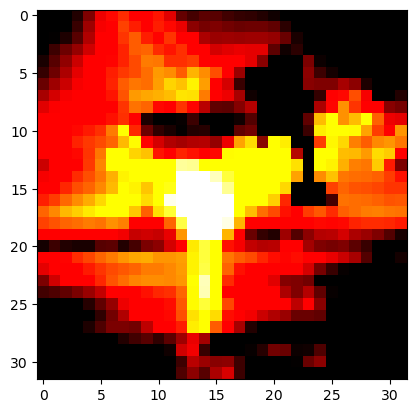

In [18]:
img, label = testing_dataset[76]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label])

performance metrics

In [19]:
import seaborn as sns
def print_stats_percentage_train_test(algorithm_name, y_test, y_pred):
    print("------------------------------------------------------")
    print("------------------------------------------------------")
    print("algorithm is: ", algorithm_name)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred) )
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(confmat, annot=True, cmap='Greens', fmt='d', ax=ax)
    plt.show()
    print("confusion matrix")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print("Classification report:")
    print(classification_report(y_true=y_test, y_pred=y_pred))

------------------------------------------------------
------------------------------------------------------
algorithm is:  Two layers
Accuracy: 0.68


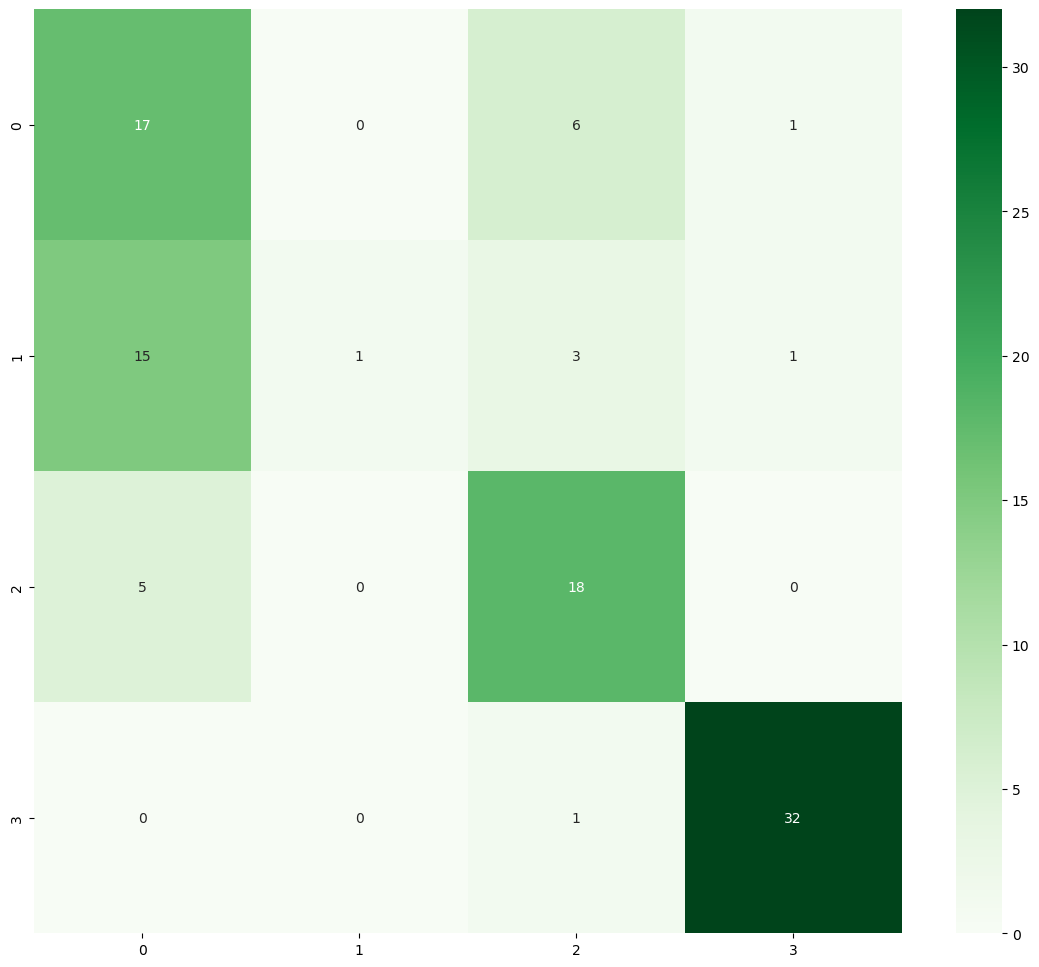

confusion matrix
[[17  0  6  1]
 [15  1  3  1]
 [ 5  0 18  0]
 [ 0  0  1 32]]
Precision: 0.769
Recall: 0.680
F1-measure: 0.630
Classification report:
              precision    recall  f1-score   support

           0       0.46      0.71      0.56        24
           1       1.00      0.05      0.10        20
           2       0.64      0.78      0.71        23
           3       0.94      0.97      0.96        33

    accuracy                           0.68       100
   macro avg       0.76      0.63      0.58       100
weighted avg       0.77      0.68      0.63       100



In [20]:
print_stats_percentage_train_test("Two layers", labels, pred)


Adverseraial Images
ADDING 300 ADVERSARIAL IMAGES - PART 1

In [21]:
from torchvision.io import read_image
from PIL import Image, ImageDraw, ImageFilter

Adding rain images to 100 sunrise images


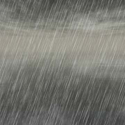

In [5]:
image_rain = Image.open('./train/rain/rain1.jpg')
image_rain = image_rain.resize((125,125))
image_rain


In [6]:
from PIL import Image
import glob
import os

files = glob.glob("./train/sunrise/*.jpg")
target_dir = './train1/sunrise/'

c = 357
for myFile in files:
    if c < 458:
        my_im = Image.open(myFile)
        # my_im.show()
        # resized_my_im = my_im.resize((28, 28))  # Resize from 100x100x3 to 28x28
        # resized_my_im.show()
        my_im.paste(image_rain)
        # my_im.show()
        filepath = os.path.join(target_dir, f"sunrise{c}.jpg")
        my_im.save(filepath)
        # print(resized_my_im)
        # resized_my_im.show()
        c = c + 1


Adding cloudy images to 100 sunrise images

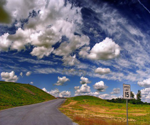

In [19]:
image_cloudy = Image.open('./train/cloudy/cloudy142.jpg')
image_cloudy = image_cloudy.resize((150,125))
image_cloudy


In [21]:
import glob
import os
from PIL import Image

files = glob.glob("./train/sunrise/*.jpg")
target_dir = './train1/sunrise/'

c = 458
for myFile in files:
    if c < 559:
        my_im = Image.open(myFile)
        # my_im.show()
        # resized_my_im = my_im.resize((28, 28))  # Resize from 100x100x3 to 28x28
        # resized_my_im.show()
        my_im.paste(image_cloudy)
        # my_im.show()
        filepath = os.path.join(target_dir, f"sunrise{c}.jpg")
        my_im.save(filepath)
        # print(resized_my_im)
        # resized_my_im.show()
        c = c + 1


Adding shine images to 100 sunrise images

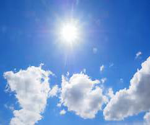

In [22]:
image_shine = Image.open('./train/shine/shine149.jpg')
image_shine = image_shine.resize((150,125))
image_shine


In [23]:
import glob
import os
from PIL import Image

files = glob.glob("./train1/cloudy/*.jpg")
target_dir = './train1/sunrise/'

c = 559
for myFile in files:
    if c < 660:
        my_im = Image.open(myFile)
        # my_im.show()
        # resized_my_im = my_im.resize((28, 28))  # Resize from 100x100x3 to 28x28
        # resized_my_im.show()
        my_im.paste(image_shine)
        # my_im.show()
        filepath = os.path.join(target_dir, f"sunrise{c}.jpg")
        my_im.save(filepath)
        # print(resized_my_im)
        # resized_my_im.show()
        c = c + 1
